## **Ex. No. 13 - Perform Basic Time Series Analysis on Patient Heart Rate Measurements**
---
Niranjana A

220301061

III BME - "A"

---

https://www.kaggle.com/datasets/ahmadsaeed1007/heart-rate-time-series-mitbih-database


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Continuous data/HR.csv')

In [ ]:
df

,Total_Obs,Day_Obs,Date,Time,Heart.Rate,Max_70_perc
0,139292,1,01-04-2019,12:00:00 AM,57,136.5
1,139293,2,01-04-2019,12:00:10 AM,57,136.5
2,139294,3,01-04-2019,12:00:20 AM,58,136.5
3,139295,4,01-04-2019,12:00:25 AM,61,136.5
4,139296,5,01-04-2019,12:00:30 AM,62,136.5
...,...,...,...,...,...,...
1048570,1187862,5542,08-07-2019,01:29:30 PM,102,136.5
1048571,1187863,5543,08-07-2019,01:29:35 PM,99,136.5
1048572,1187864,5544,08-07-2019,01:29:40 PM,98,136.5
1048573,1187865,5545,08-07-2019,01:29:45 PM,97,136.5


In [ ]:
df.isnull().sum()

,0
Total_Obs,0
Day_Obs,0
Date,0
Time,0
Heart.Rate,0
Max_70_perc,0


In [ ]:
df['Time'] = df['Time'].str.replace(' AM', '').str.replace(' PM', '')
df

,Total_Obs,Day_Obs,Date,Time,Heart.Rate,Max_70_perc
0,139292,1,01-04-2019,12:00:00,57,136.5
1,139293,2,01-04-2019,12:00:10,57,136.5
2,139294,3,01-04-2019,12:00:20,58,136.5
3,139295,4,01-04-2019,12:00:25,61,136.5
4,139296,5,01-04-2019,12:00:30,62,136.5
...,...,...,...,...,...,...
1048570,1187862,5542,08-07-2019,01:29:30,102,136.5
1048571,1187863,5543,08-07-2019,01:29:35,99,136.5
1048572,1187864,5544,08-07-2019,01:29:40,98,136.5
1048573,1187865,5545,08-07-2019,01:29:45,97,136.5


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df

,Total_Obs,Day_Obs,Date,Time,Heart.Rate,Max_70_perc
0,139292,1,2019-04-01,12:00:00,57,136.5
1,139293,2,2019-04-01,12:00:10,57,136.5
2,139294,3,2019-04-01,12:00:20,58,136.5
3,139295,4,2019-04-01,12:00:25,61,136.5
4,139296,5,2019-04-01,12:00:30,62,136.5
...,...,...,...,...,...,...
1048570,1187862,5542,2019-07-08,01:29:30,102,136.5
1048571,1187863,5543,2019-07-08,01:29:35,99,136.5
1048572,1187864,5544,2019-07-08,01:29:40,98,136.5
1048573,1187865,5545,2019-07-08,01:29:45,97,136.5


In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df

,Total_Obs,Day_Obs,Date,Time,Heart.Rate,Max_70_perc,DateTime
0,139292,1,2019-04-01,12:00:00,57,136.5,2019-04-01 12:00:00
1,139293,2,2019-04-01,12:00:10,57,136.5,2019-04-01 12:00:10
2,139294,3,2019-04-01,12:00:20,58,136.5,2019-04-01 12:00:20
3,139295,4,2019-04-01,12:00:25,61,136.5,2019-04-01 12:00:25
4,139296,5,2019-04-01,12:00:30,62,136.5,2019-04-01 12:00:30
...,...,...,...,...,...,...,...
1048570,1187862,5542,2019-07-08,01:29:30,102,136.5,2019-07-08 01:29:30
1048571,1187863,5543,2019-07-08,01:29:35,99,136.5,2019-07-08 01:29:35
1048572,1187864,5544,2019-07-08,01:29:40,98,136.5,2019-07-08 01:29:40
1048573,1187865,5545,2019-07-08,01:29:45,97,136.5,2019-07-08 01:29:45


In [ ]:
df = df.set_index('DateTime')
df

,Total_Obs,Day_Obs,Date,Time,Heart.Rate,Max_70_perc
DateTime,,,,,,
2019-04-01 12:00:00,139292,1,2019-04-01,12:00:00,57,136.5
2019-04-01 12:00:10,139293,2,2019-04-01,12:00:10,57,136.5
2019-04-01 12:00:20,139294,3,2019-04-01,12:00:20,58,136.5
2019-04-01 12:00:25,139295,4,2019-04-01,12:00:25,61,136.5
2019-04-01 12:00:30,139296,5,2019-04-01,12:00:30,62,136.5
...,...,...,...,...,...,...
2019-07-08 01:29:30,1187862,5542,2019-07-08,01:29:30,102,136.5
2019-07-08 01:29:35,1187863,5543,2019-07-08,01:29:35,99,136.5
2019-07-08 01:29:40,1187864,5544,2019-07-08,01:29:40,98,136.5


In [ ]:
df['Heart Rate'] = pd.to_numeric(df['Heart.Rate'], errors='coerce')
df = df.dropna(subset=['Heart Rate'])

In [ ]:
df_hourly = df.groupby(pd.Grouper(freq='h'))['Heart Rate'].mean()
df_hourly

,Heart Rate
DateTime,
2019-04-01 01:00:00,74.500000
2019-04-01 02:00:00,65.998408
2019-04-01 03:00:00,60.308365
2019-04-01 04:00:00,60.423586
2019-04-01 05:00:00,62.403333
...,...
2019-07-08 08:00:00,52.769596
2019-07-08 09:00:00,68.882096
2019-07-08 10:00:00,68.667458


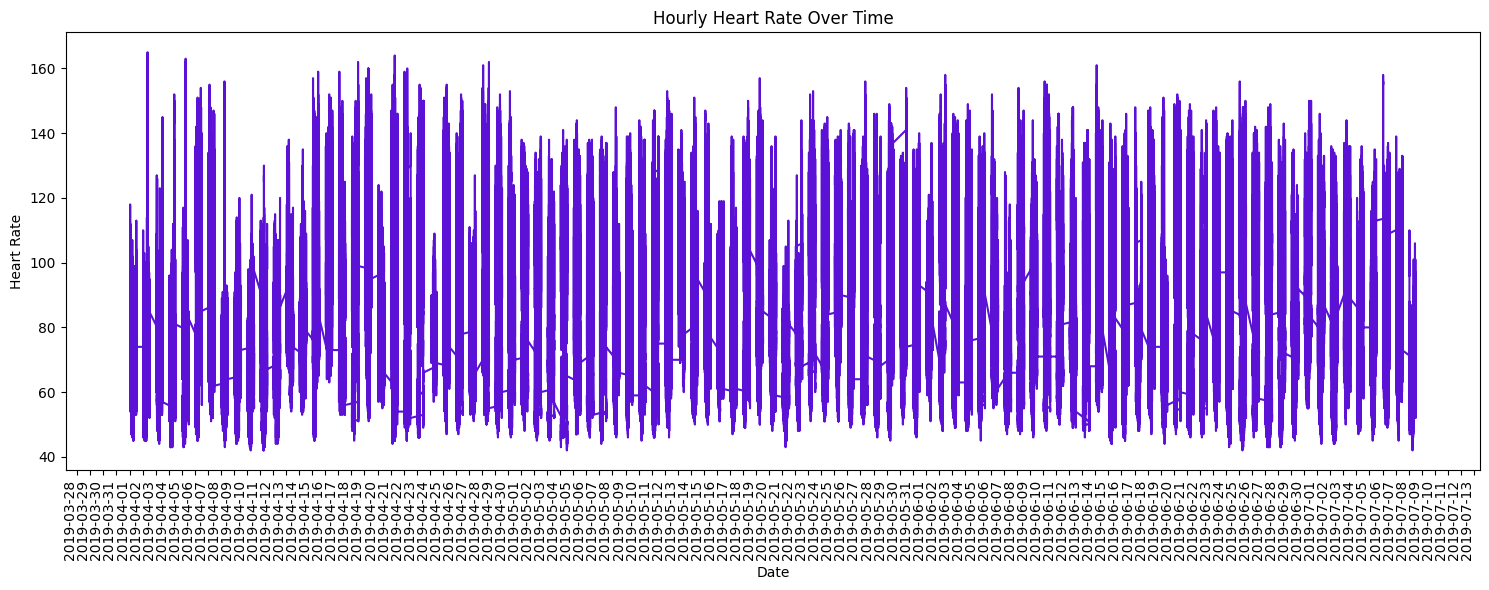

In [ ]:
import matplotlib.dates as mdates

# Convert DateTimeIndex to numerical values for plotting, but extract only dates
x_values = mdates.date2num(df.index.to_pydatetime())

plt.figure(figsize=(15, 6))
# Create the plot
plt.plot(x_values, df['Heart Rate'], color = "#5b12d6")

# Customize the plot
plt.xlabel('Date')  # Changed x-axis label
plt.ylabel('Heart Rate')
plt.title('Hourly Heart Rate Over Time')

# Format x-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Daily ticks

plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Show the plot
plt.show()

<bound method XAxis.set of <matplotlib.axis.XAxis object at 0x79d8ba2ccf70>>

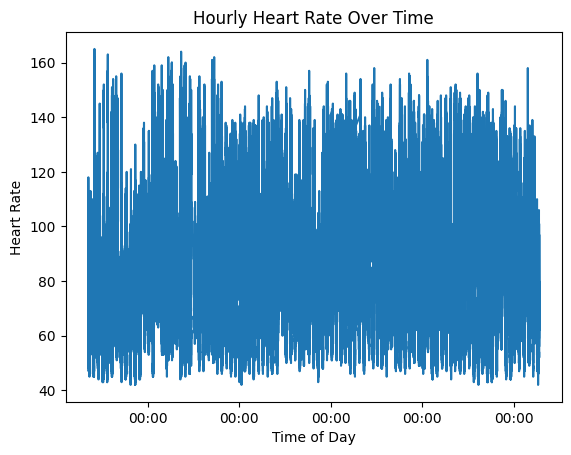

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Assuming your data is in a pandas DataFrame called 'df' with 'DateTime' as index
# and 'Heart Rate' as the column

# Convert DateTimeIndex to numerical values for plotting
x_values = mdates.date2num(df.index.to_pydatetime())

# Create the plot
plt.plot(x_values, df['Heart Rate'])

# Customize the plot
plt.xlabel('Time of Day')
plt.ylabel('Heart Rate')
plt.title('Hourly Heart Rate Over Time')

# Format x-axis to display time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set

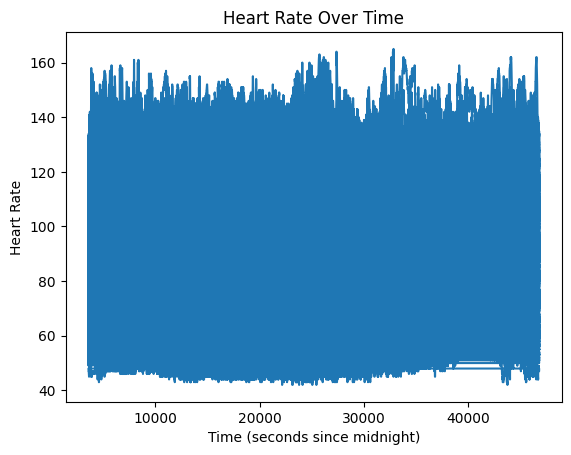

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Convert 'Time' column to seconds since midnight
# Assuming 'Time' is in format HH:MM:SS
df['Time_seconds'] = pd.to_timedelta(df['Time'].astype(str)).dt.total_seconds()

# Plot with the converted 'Time_seconds' column
plt.plot(df['Time_seconds'], df['Heart.Rate'])
plt.xlabel('Time (seconds since midnight)')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Over Time')
plt.show()